<a href="https://colab.research.google.com/github/YELISETTYMANIKANTA/ADM-Lab/blob/main/ADM_ASS_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
df = pd.read_csv("employee_performance.csv")
print("Original Dataset:\n", df.head())



Original Dataset:
    Employee_ID  Department  Monthly_Salary  Years_of_Experience  \
0            1          HR       115382.10                   17   
1            2          HR        32428.50                    6   
2            3  Operations        48202.18                    9   
3            4          IT        39488.41                    1   
4            5          HR        64898.09                    6   

   Performance_Score  
0                 10  
1                  7  
2                 10  
3                  4  
4                  7  


In [3]:
# Generate statistical summaries
print("\nStatistical Summary:\n", df.describe())


Statistical Summary:
        Employee_ID  Monthly_Salary  Years_of_Experience  Performance_Score
count   100.000000      100.000000           100.000000         100.000000
mean     50.500000    74155.081700            10.240000           5.500000
std      29.011492    24765.021112             5.778959           2.858622
min       1.000000    30634.090000             1.000000           1.000000
25%      25.750000    54103.632500             6.000000           3.000000
50%      50.500000    73622.835000            10.000000           6.000000
75%      75.250000    94087.112500            16.000000           8.000000
max     100.000000   119817.320000            20.000000          10.000000


In [4]:
# Data Transformation and Aggregation
# Encoding categorical variables
df = pd.get_dummies(df, columns=['Department'], drop_first=True)


In [5]:
# Create new derived columns
df['Salary_Per_Experience'] = df['Monthly_Salary'] / (df['Years_of_Experience'] + 1)  # Avoid division by zero


In [6]:
# Grouping and Aggregation
summary = df.groupby('Years_of_Experience').agg({'Monthly_Salary': 'mean', 'Performance_Score': 'mean'}).reset_index()
print("\nGrouped Summary:\n", summary.head())




Grouped Summary:
    Years_of_Experience  Monthly_Salary  Performance_Score
0                    1    63365.036667           4.666667
1                    2    70281.161667           7.000000
2                    3    70576.383333           4.555556
3                    4    67853.795000           6.000000
4                    5    74118.825000           5.000000


In [7]:

# Visualization
plt.figure(figsize=(12, 5))



<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Histogram of Monthly Salaries')

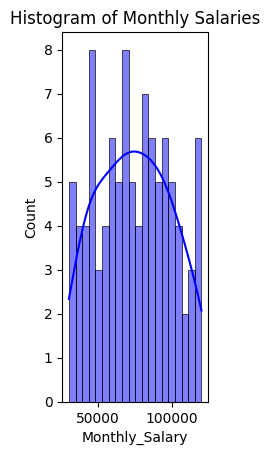

In [8]:

# Histogram of Monthly Salaries
plt.subplot(1, 3, 1)
sns.histplot(df['Monthly_Salary'], bins=20, kde=True, color='blue')
plt.title('Histogram of Monthly Salaries')



Text(0.5, 1.0, 'Experience vs. Performance Score')

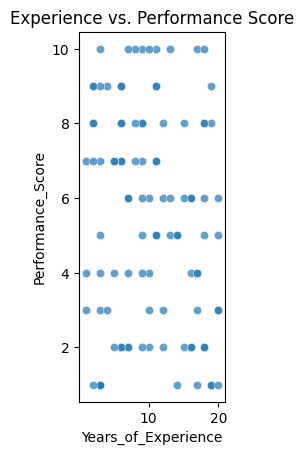

In [9]:

# Scatter Plot: Years of Experience vs. Performance Score
plt.subplot(1, 3, 2)
sns.scatterplot(x=df['Years_of_Experience'], y=df['Performance_Score'], alpha=0.7)
plt.title('Experience vs. Performance Score')



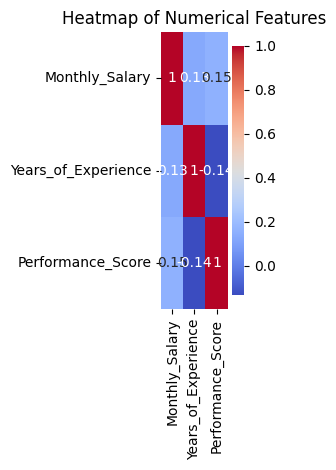

In [10]:

# Heatmap of numerical features
plt.subplot(1, 3, 3)
sns.heatmap(df[['Monthly_Salary', 'Years_of_Experience', 'Performance_Score']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Numerical Features')

plt.tight_layout()
plt.show()